In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import regions
from astropy.table import *
from tqdm import tqdm
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS

In [2]:
import matplotlib

plt.rc('font', family='serif'), plt.rc('xtick', labelsize=18), plt.rc('ytick', labelsize=18)
plt.rcParams['savefig.dpi'] = 300
plt.rc('text',usetex=True)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
np.set_printoptions(precision=3)

### vos commands for downloading from CANFAR

getCert

vcp vos:[imLoc]  ./ --verbose 

In [3]:
# useful params catalogs

cat_name = 'DEEP_deep'
cat_a = Table.read('CUT_deep_catalogs/s16a_'+cat_name+'_masterCat.fits')
cat_t = Table.read('CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_'+cat_name+'.fits')
cat_v2 = Table.read('clauds_cat_v2020/'+cat_name+'_v2_v200930.fits')
cat_v4 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name+'_v4_gal_cut_params.fits')
cat_v6 = Table.read('clauds_cat_v2020/completeness_useful_params_cat/'+cat_name+'_v6_gal_cut_params.fits')

In [4]:
# total number of objects

print("Anneya's catalog", len(cat_a))
print("Thibaud's catalog", len(cat_t))
print("Vincent's v2 catalog", len(cat_v2))
print("Vincent's v4 catalog", len(cat_v4))
print("Vincent's v6 catalog", len(cat_v6))

Anneya's catalog 1441537
Thibaud's catalog 1777967
Vincent's v2 catalog 3229118
Vincent's v4 catalog 2743065
Vincent's v6 catalog 2749999


### compare v2,v4 and v6 catalogs

In [7]:
# select galaxies
cat_v2_gal =  cat_v2[cat_v2['OBJ_TYPE'] == 0]
cat_v4_gal =  cat_v4[cat_v4['OBJ_TYPE'] == 0]
cat_v6_gal =  cat_v6[cat_v6['OBJ_TYPE'] == 0]

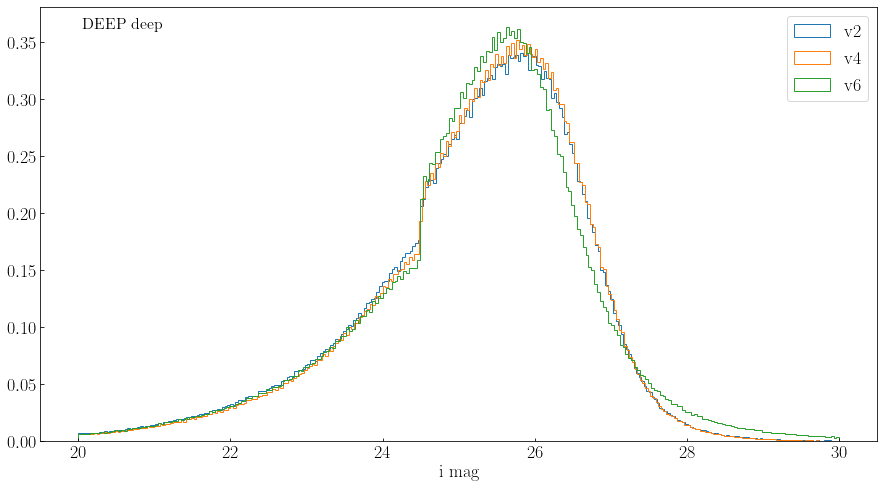

In [11]:
fig = plt.figure(figsize=(15,8))

plt.hist(cat_v2_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v2')
plt.hist(cat_v4_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v4')
plt.hist(cat_v6_gal['i'],bins='scott',range=(20,30),histtype='step',density=True,label='v6')

plt.xlabel('i mag',fontsize=18)
plt.annotate(cat_name.replace('_',' '),xy=([0.05,0.95]),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=18)
plt.show()

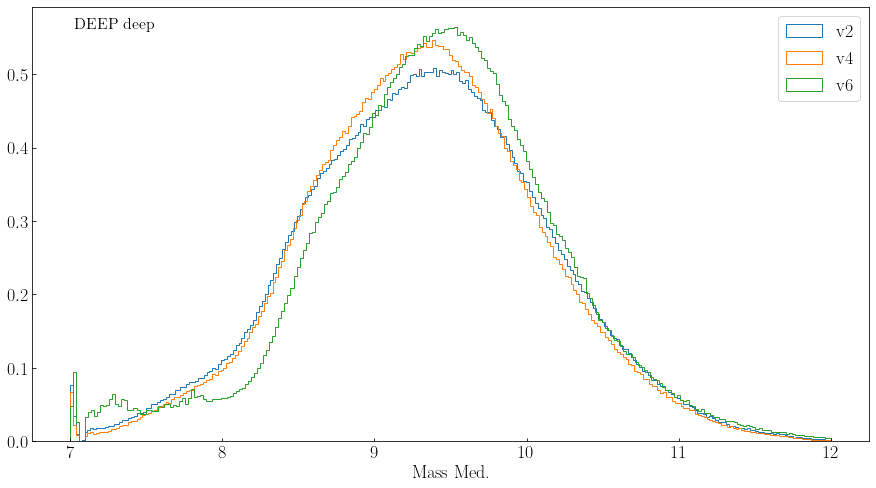

In [12]:
fig = plt.figure(figsize=(15,8))

plt.hist(cat_v2_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='v2')
plt.hist(cat_v4_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='v4')
plt.hist(cat_v6_gal['MASS_MED'],bins='scott',range=(7,12),histtype='step',density=True,label='v6')

plt.xlabel('Mass Med.',fontsize=18)
plt.annotate(cat_name.replace('_',' '),xy=([0.05,0.95]),xycoords='axes fraction',fontsize=16)
plt.legend(fontsize=18)
plt.show()

In [95]:
cat_v6_full = Table.read('/Volumes/LejaySSD/v6_cats/DEEP_deep_v6_v201223.fits')
cat_v6_full = cat_v6_full['RA','DEC','Z_ML','Z_BEST','ZPHOT','MASS_MED','OBJ_TYPE']
cat_v6_gal_full =  cat_v6_full[cat_v6_full['OBJ_TYPE'] == 0]

Text(0, 0.5, '$z_{PHOT}$')

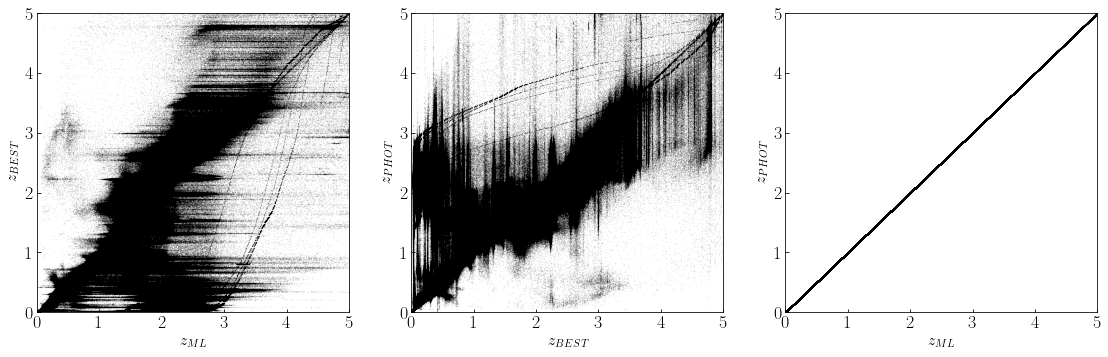

In [101]:
# z_ml  z_best photoz comparison
fig, axs = plt.subplots(1, 3, figsize=(19,5.5))

# z_ml vs z_best
axs[0].scatter(cat_v6_gal_full['Z_ML'],cat_v6_gal_full['Z_BEST'],s=0.05,color='k',alpha=0.1)
axs[0].set_xlim([0,5])
axs[0].set_ylim([0,5])
axs[0].set_xlabel(r'$z_{ML}$',fontsize=16)
axs[0].set_ylabel(r'$z_{BEST}$',fontsize=16)

# z_best vs photoz
axs[1].scatter(cat_v6_gal_full['Z_BEST'],cat_v6_gal_full['ZPHOT'],s=0.05,color='k',alpha=0.1)
axs[1].set_xlim([0,5])
axs[1].set_ylim([0,5])
axs[1].set_xlabel(r'$z_{BEST}$',fontsize=16)
axs[1].set_ylabel(r'$z_{PHOT}$',fontsize=16)

# z_ml vs photoz
axs[2].scatter(cat_v6_gal_full['Z_ML'],cat_v6_gal_full['ZPHOT'],s=0.05,color='k',alpha=0.1)
axs[2].set_xlim([0,5])
axs[2].set_ylim([0,5])
axs[2].set_xlabel(r'$z_{ML}$',fontsize=16)
axs[2].set_ylabel(r'$z_{PHOT}$',fontsize=16)

### catalog comparison
anneya's, vincent's v2 and v4 (v3 in COSMOS_uddd)

In [13]:
fig = plt.figure(figsize=(12,8))

plt.scatter(cat_t_gal['zKDEPeak'], cat_t_gal['MASS_MED'],s=0.1,alpha=0.1,c='r')
plt.scatter(cat_v4_gal['Z_BEST'], cat_v4_gal['MASS_MED'],s=0.1,alpha=0.1,c='k')
plt.xlim([-0.02,1.1])
plt.ylim([7,12.3])

plt.xlabel('redshift',fontsize=20)
plt.ylabel(r'$\log(M/M_\odot)$',fontsize=20)

NameError: name 'cat_t_gal' is not defined

<Figure size 864x576 with 0 Axes>

###  catalog comparison with COSMOS2015
anneya's, vincent's v2, v4 and v6 (v3 in COSMOS_uddd)

1. compare mass and redshift

In [54]:
import os

In [134]:
# compare v6 with cosmos2015

cat_v_name = 'clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v6_gal_cut_params.fits'
cat_2015_name = 'COSMOS2015_Laigle+_v1.1.fits'
combined_cat_name = 'COSMOS2015_Laigle_Vincent_added.fits'
# matching
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_v_name + \
                ' in2='+cat_2015_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name

os.system(cmd)
print(cmd)

# keep useful parameters
cat=Table.read(combined_cat_name)
useful_params = ['Z_BEST','ZPHOT','Z_ML','ZPDF','MASS_MED_1','MASS_MED_2','SSFR_MED_1','i','inside_u','inside_uS','OBJ_TYPE']
cat = cat[useful_params]
cat.rename_column('SSFR_MED_1','SSFR_MED')
cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
cat.rename_column('MASS_MED_2','MASS_MED_COSMOS')  # mass from COSMOS2015
cat.write(combined_cat_name, overwrite=True)

java -jar stilts.jar tmatch2 in1=clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v6_gal_cut_params.fits in2=COSMOS2015_Laigle+_v1.1.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=COSMOS2015_Laigle_Vincent_added.fits


In [105]:
# compare cat_a with cosmos2015

cat_a_name = 'CUT_deep_catalogs/s16a_COSMOS_deep_masterCat.fits'
cat_2015_name = 'COSMOS2015_Laigle+_v1.1.fits'
combined_cat_name = 'COSMOS2015_Laigle_Anneya_added.fits'
# matching
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_a_name + \
                ' in2='+cat_2015_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name

os.system(cmd)
print(cmd)

# keep useful parameters
cat=Table.read(combined_cat_name)
useful_params = ['zKDEPeak','zKDEMedian','ZPDF','MASS_MED_1','MASS_MED_2','SSFR_MED_1','i','inside','preds_median']
cat = cat[useful_params]
cat.rename_column('SSFR_MED_1','SSFR_MED')
cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
cat.rename_column('MASS_MED_2','MASS_MED_COSMOS')  # mass from COSMOS2015
cat.write(combined_cat_name, overwrite=True)

java -jar stilts.jar tmatch2 in1=CUT_deep_catalogs/s16a_COSMOS_deep_masterCat.fits in2=COSMOS2015_Laigle+_v1.1.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=COSMOS2015_Laigle_Anneya_added.fits


In [110]:
# compare cat_t with cosmos2015

cat_t_name = 'CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_COSMOS_deep.fits'
cat_2015_name = 'COSMOS2015_Laigle+_v1.1.fits'
combined_cat_name = 'COSMOS2015_Laigle_Thibaud_added.fits'
# matching
cmd = 'java -jar stilts.jar tmatch2 in1='+cat_t_name + \
                ' in2='+cat_2015_name+' find=best join=1and2 matcher=sky params=1.0 values1="RA DEC"' + \
                ' values2="ALPHA_J2000 DELTA_J2000" out='+combined_cat_name

os.system(cmd)
print(cmd)

# keep useful parameters
cat=Table.read(combined_cat_name)
useful_params = ['Z_BEST_BC03','ZPDF','MASS_MED_1','MASS_MED_2','SSFR_MED_1','i','CLASS_1']
cat = cat[useful_params]
cat.rename_column('SSFR_MED_1','SSFR_MED')
cat.rename_column('CLASS_1','CLASS')
cat.rename_column('MASS_MED_1','MASS_MED')   # mass from Vincent's catalog
cat.rename_column('MASS_MED_2','MASS_MED_COSMOS')  # mass from COSMOS2015
cat.write(combined_cat_name, overwrite=True)

java -jar stilts.jar tmatch2 in1=CUT_deep_catalogs/UV_CLAUDS_HSC_S16A_COSMOS_deep.fits in2=COSMOS2015_Laigle+_v1.1.fits find=best join=1and2 matcher=sky params=1.0 values1="RA DEC" values2="ALPHA_J2000 DELTA_J2000" out=COSMOS2015_Laigle_Thibaud_added.fits


plot comparison results

(7, 12.5)

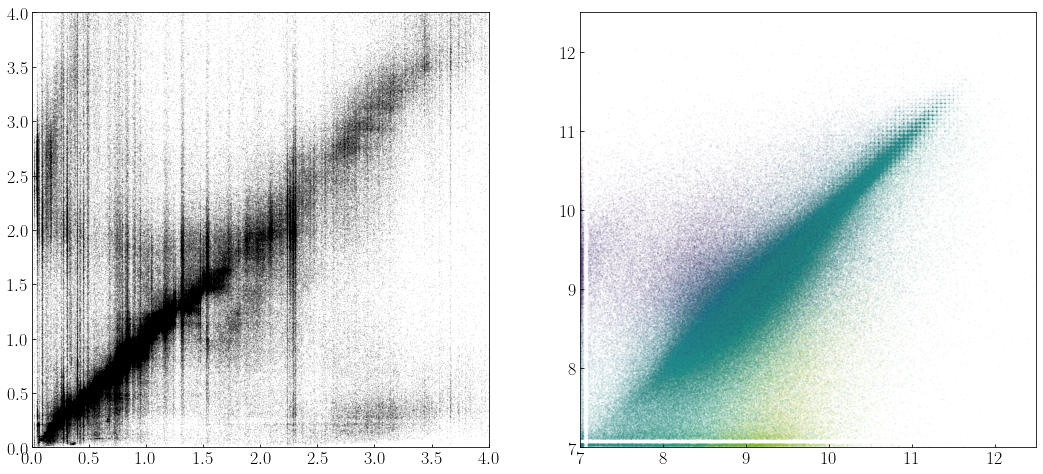

In [62]:
cat = Table.read('COSMOS2015_Laigle_Vincent_added.fits')

# select galaxies with inside flag

# z/mass comparison
fig, axs = plt.subplots(1, 2, figsize=(18,8))

# z
axs[0].scatter(cat['Z_BEST'],cat['ZPDF'],s=0.1,color='k',alpha=0.1)
axs[0].set_xlim([0,4])
axs[0].set_ylim([0,4])

# mass
axs[1].scatter(cat['MASS_MED'],cat['MASS_MED_COSMOS'],s=0.1,c=cat['Z_BEST']-cat['ZPDF'],alpha=0.1,vmin=-3,vmax=3)
axs[1].set_xlim([7,12.5])
axs[1].set_ylim([7,12.5])

# calculate fraction of consistent mass/z objects


### mass vs.  magnitude (at certain z)

1. the catalog: v6 catalog matched with COSMOS2015
2. separates sf/q (sSFR or SVM classification)
3. 0.1 $\Delta z$ bins

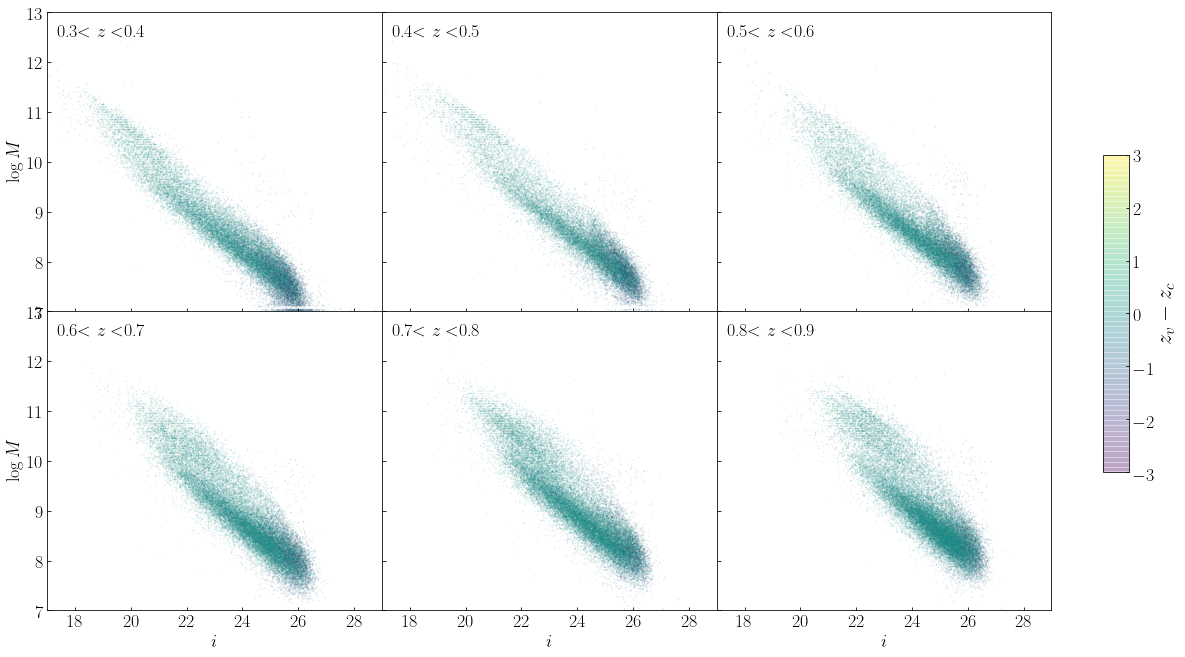

In [133]:
fig, axs = plt.subplots(2, 3, figsize=(18,11),sharey=True, sharex=True)
cat_type = 'cat_v'

# load the catalog
if cat_type == 'cat_a':
    cat = Table.read('COSMOS2015_Laigle_Anneya_added.fits')
    cat = cat[cat['preds_median']<0.89]  # select gals
    z_keyname = 'zKDEPeak'
elif cat_type == 'cat_t':
    cat = Table.read('COSMOS2015_Laigle_Thibaud_added.fits')
    cat = cat[cat['CLASS']==0]  # select gals
    z_keyname = 'Z_BEST_BC03'
else:
    cat = Table.read('COSMOS2015_Laigle_Vincent_added.fits')
    cat = cat[cat['OBJ_TYPE']==0]  # select gals
    z_keyname = 'Z_ML'
# cat = Table.read('clauds_cat_v2020/completeness_useful_params_cat/COSMOS_deep_v6_gal_cut_params.fits')

for i,z in enumerate([0.35,0.45,0.55,0.65,0.75,0.85]):
    cat_z = cat[abs(cat[z_keyname]-z)<0.05]  # redshift selection
    
#     # sf/q separation
#     cat_z_sf = cat_z[cat_z['SSFR_MED']>-11]
#     cat_z_q = cat_z[cat_z['SSFR_MED']<-11]
    
    # plot 
    row = i // 3
    col = i % 3
#     axs[row][col].scatter(cat_z_sf['i'],cat_z_sf['MASS_MED'],s=0.05,c='b',alpha=0.05)
#     axs[row][col].scatter(cat_z_q['i'],cat_z_q['MASS_MED'],s=0.05,c='r',alpha=0.05)

    im = axs[row][col].scatter(cat_z['i'],cat_z['MASS_MED'],s=0.1,c=cat_z[z_keyname]-cat_z['ZPDF'],alpha=0.2,vmin=-3,vmax=3)
    axs[row][col].annotate(str(round(z-0.05,2))+"$<z<$"+str(round(z+0.05,2)),xy=([0.03,0.92]),
                    xycoords='axes fraction',fontsize=18)
    
# lables and xy_limits
axs[1][0].set_xlabel(r'$i$',fontsize=18)
axs[1][1].set_xlabel(r'$i$',fontsize=18)
axs[1][2].set_xlabel(r'$i$',fontsize=18)
axs[0][0].set_ylabel(r'$\log M$',fontsize=18)
axs[1][0].set_ylabel(r'$\log M$',fontsize=18)
axs[0][0].set_xlim([17,29])
axs[0][0].set_ylim([7,13])
fig.subplots_adjust(hspace=0) 
fig.subplots_adjust(wspace=0)
cb_ax = fig.add_axes([0.94, 0.3, 0.02, 0.4])
cbar = fig.colorbar(im, cax=cb_ax)
cbar.ax.set_ylabel(r'$z_v - z_c$',fontsize=22)
plt.show()